In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/AB_NYC_2019.csv')


In [2]:
# Check for any inconsistencies
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29203 entries, 0 to 29202
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              29203 non-null  int64  
 1   name                            29187 non-null  object 
 2   host_id                         29202 non-null  float64
 3   host_name                       29184 non-null  object 
 4   neighbourhood_group             29202 non-null  object 
 5   neighbourhood                   29202 non-null  object 
 6   latitude                        29202 non-null  float64
 7   longitude                       29202 non-null  float64
 8   room_type                       29202 non-null  object 
 9   price                           29202 non-null  float64
 10  minimum_nights                  29202 non-null  float64
 11  number_of_reviews               29202 non-null  float64
 12  last_review                     

In [3]:
# Check for missing values
print(df.isnull().sum())

# Import missing values for numerical columns
df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace=True)


id                                   0
name                                16
host_id                              1
host_name                           19
neighbourhood_group                  1
neighbourhood                        1
latitude                             1
longitude                            1
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       4830
reviews_per_month                 4830
calculated_host_listings_count       1
availability_365                     1
dtype: int64


In [4]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)


0


In [5]:
# Standardize formatting (example: converting column names to lowercase)
df.columns = df.columns.str.lower()

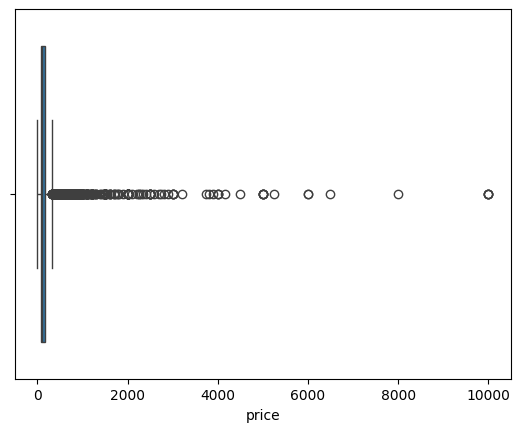

In [6]:
# Visualize outliers (example: using boxplots)
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['price'])
plt.show()



In [7]:
# Address outliers (example: removing values beyond a certain threshold)
# Assuming 'price' has outliers
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]